In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
s0_sp =2630.07
s0_na = 7897.128
s0_ru = 1180.319
k_sp = 0.7*s0_sp
k_na = 0.7*s0_na
k_ru = 0.7*s0_ru
T = 550/365
q_sp = 0.023428
q_na = 0.011904
q_ru = 0.017059
r = 0.00368677991 # risk-free rate at 550 days
sigma_sp = 0.3642
sigma_na = 0.36323
sigma_ru = 0.41784

In [3]:
n =50000

In [4]:
# correlation matrix
rho = np.array([[1.0000000, 0.9687259, 0.9265651],
              [0.9687259, 1.0000000, 0.9207791],
               [0.9265651, 0.9207791, 1.0000000]])

In [5]:
sigma_matrix = np.mat([[0.3642, 0,0],[0,0.36323, 0,],[0,0,0.41784]])

In [6]:
# sqaure root of covariance matrix
cov_root = sigma_matrix*np.linalg.cholesky(rho)
cov_root

matrix([[0.3642    , 0.        , 0.        ],
        [0.35187031, 0.09012946, 0.        ],
        [0.38715596, 0.03905293, 0.15223467]])

## ds_sp  = (r-0.023428)*s_sp*dt+ 0.3462*s_sp*dx1
## ds_na = (r-0.011904)*s_na*dt +0.3518703*s_na*dx1+0.0901295*s_na*dx2
## ds_ru = (r - 0.017059)*s_ru*dt + 0.3871560*s_ru*dx1+0.03905301*s_ru*dx2+0.1522346*s_ru*dx3

In [10]:
time_grid = np.array([0.084931507,0.167123288,0.249315068,0.331506849,0.416438356,0.501369863,0.583561644,0.668493151,0.75890411,0.835616438,0.920547945,1.00,1.082191781,
                      1.164383562,1.249315068,1.331506849,1.416438356,1.506849315])

In [51]:
np.random.seed(9)
S_sp = np.zeros([2*n, 18])
S_na = np.zeros([2*n, 18])
S_ru = np.zeros([2*n, 18])

In [52]:
monte_calo_sp = np.zeros([2*n,18])
monte_calo_na = np.zeros([2*n,18])
monte_calo_ru = np.zeros([2*n,18])

In [53]:
# Antithetic variables
def mc(x):
    for i in range(2 * n):
        if i % 2 == 0:
            x[i, :] = np.random.normal(0, 1, 18)
        else:
            x[i, :] = -x[i - 1, :]



mc(monte_calo_sp)
mc(monte_calo_na)
mc(monte_calo_ru)

In [54]:
V = np.zeros(2*n)

In [13]:
def monte_carlo_simulation(s0_sp,s0_na,s0_ru,k_sp,k_na,k_ru,T, q_sp,q_na,q_ru,r,sigma_sp,sigma_na,sigma_ru,n ):
    np.random.seed(9)
    S_sp = np.zeros([2*n, 18])
    S_na = np.zeros([2*n, 18])
    S_ru = np.zeros([2*n, 18])
    monte_calo_sp = np.zeros([2*n,18])
    monte_calo_na = np.zeros([2*n,18])
    monte_calo_ru = np.zeros([2*n,18])
    
    # Antithetic variables
    def mc(x):
        for i in range(2 * n):
            if i % 2 == 0:
                x[i, :] = np.random.normal(0, 1, 18)
            else:
                x[i, :] = -x[i - 1, :]



    mc(monte_calo_sp)
    mc(monte_calo_na)
    mc(monte_calo_ru)
    
    V = np.zeros(2*n)
    
    # simulate 2*n paths
    for j in range(2 * n):
        # simulate every points in each path
        for i in range(18):
            if i == 0:
                S_sp[j, i] = s0_sp * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[0]) + sigma_sp * time_grid[0] ** 0.5 * monte_calo_sp[
                        j, i])
                S_na[j, i] = s0_na * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[0]) + cov_root[1, 0] * time_grid[0] ** 0.5 *
                    monte_calo_sp[
                        j, i] + cov_root[1, 1] * time_grid[0] ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = s0_ru * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[0]) + cov_root[2, 0] * time_grid[0] ** 0.5 *
                    monte_calo_sp[
                        j, i] + cov_root[2, 1] * time_grid[0] ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * time_grid[
                        0] ** 0.5 * monte_calo_ru[j, i])


            # review date
            elif (i == 2 or i == 5 or i == 8 or i == 11 or i == 14):
                S_sp[j, i] = S_sp[j, i - 1] * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[i] - time_grid[i - 1]) + sigma_sp * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i])
                S_na[j, i] = S_na[j, i - 1] * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[1, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[1, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = S_ru[j, i - 1] * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[2, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[2, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_ru[j, i])
                   
                if (S_sp[j, i] >= k_sp and S_na[j, i] >= k_na and S_ru[j, i] >= k_ru):
                    if (S_sp[j, i] >= s0_sp and S_na[j, i] >= s0_na and S_ru[j, i] >= s0_ru):
                        V[j] = np.exp((T - time_grid[i] - 5 / 365) * r) * 1033.75 + V[j]                  #each asset price greater than its initial price, autocall and break the loop
                        break
                    else:
                        V[j] = np.exp((T - time_grid[i] - 5 / 365) * r) * 33.75 + V[j]                  # otherwise, get the contingent interest pay
            

            # final review day
            elif i == 17:
                S_sp[j, i] = S_sp[j, i - 1] * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[i] - time_grid[i - 1]) + sigma_sp * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i])
                S_na[j, i] = S_na[j, i - 1] * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[1, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[1, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = S_ru[j, i - 1] * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[2, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[2, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_ru[j, i])

                if (S_sp[j, i] >= s0_sp and S_na[j, i] >= s0_na and S_ru[j, i] >= s0_ru) or (
                        np.all(S_sp[j, 0:i] >= k_sp) and np.all(S_na[j, 0:i] >= k_na) and np.all(S_ru[j, 0:i] >= k_ru)):
                    V[j] = 1033.75 * np.exp(-r * (3 / 365)) + V[j]

                else:
                    if (S_sp[j, i] >= k_sp and S_na[j, i] >= k_na and S_ru[j, i] >= k_ru):
                        V[j] = (1033.75 + (1000 * np.min(
                            [S_sp[j, i] / s0_sp - 1, S_na[j, i] / s0_na - 1, S_ru[j, i] / s0_ru - 1]))) * np.exp(
                            -r * (3 / 365)) + V[j]
                    else:
                        V[j] = (1000 + (1000 * np.min(
                            [S_sp[j, i] / s0_sp - 1, S_na[j, i] / s0_na - 1, S_ru[j, i] / s0_ru - 1]))) * np.exp(
                            -r * (3 / 365)) + V[j]


            else:
                S_sp[j, i] = S_sp[j, i - 1] * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[i] - time_grid[i - 1]) + sigma_sp * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i])
                S_na[j, i] = S_na[j, i - 1] * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[1, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[1, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = S_ru[j, i - 1] * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[2, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[2, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_ru[j, i])
    return np.mean(V)


In [14]:
# value in settlement day
estimation_value = monte_carlo_simulation(s0_sp,s0_na,s0_ru,k_sp,k_na,k_ru,T, q_sp,q_na,q_ru,r,sigma_sp,sigma_na,sigma_ru,n )*np.exp(-r*T)*np.exp(r*5/365)

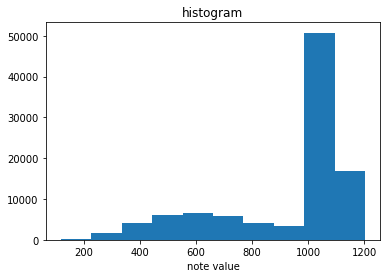

In [61]:
plt.hist(V)
plt.xlabel("note value")
plt.title("histogram")
plt.show()

In [15]:
#value error
error = 931- estimation_value
error

12.182502305907633

## sensitivity analysis

In [27]:
rr = [i/1000 for i in range(1,20,2)]

r_sensitivity_analysis = []

for j in rr:
    V = np.zeros(2*n)
    a = monte_carlo_simulation(s0_sp,s0_na,s0_ru,k_sp,k_na,k_ru,T, q_sp,q_na,q_ru,j,sigma_sp,sigma_na,sigma_ru,n )*np.exp(-r*T)*np.exp(r*5/365)
    r_sensitivity_analysis.append(a)

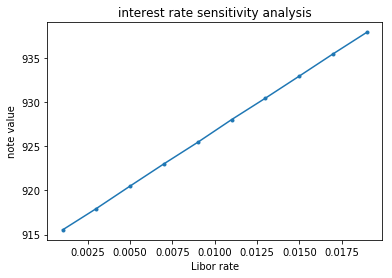

In [28]:
plt.plot(rr, r_sensitivity_analysis, marker='.')
plt.xlabel("Libor rate")
plt.ylabel("note value")
plt.title("interest rate sensitivity analysis")
plt.show()

In [74]:
siggma_sp = [i/1000 for i in range(250,500,30)]
siggma_na = [i/1000 for i in range(250,500,30)]
siggma_ru = [i/1000 for i in range(250,500,30)]

In [75]:
sigma_sensitivity_analysis = []

for (s1,s2,s3) in zip(siggma_sp, siggma_na, siggma_ru):
    V = np.zeros(2*n)
    m = np.mat([[s1, 0,0],[0,s2, 0,],[0,0,s3]])
    cov_root = m*np.linalg.cholesky(rho)
    
    b = monte_carlo_simulation(s0_sp,s0_na,s0_ru,k_sp,k_na,k_ru,T, q_sp,q_na,q_ru,r,s1,s2,s3,n )*np.exp(-r*T)*np.exp(r*5/365)
    sigma_sensitivity_analysis.append(b)

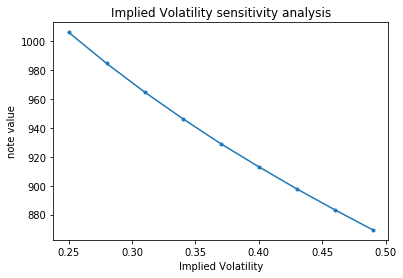

In [76]:
plt.plot(siggma_sp, sigma_sensitivity_analysis, marker='.')
plt.xlabel("Implied Volatility")
plt.ylabel("note value")
plt.title("Implied Volatility sensitivity analysis")
plt.show()

In [78]:
q_sp = q_na = q_ru = [i/1000 for i in range(10,30,2)]

In [79]:
div_yield_sensitivity_analysis = []
for (d1,d2,d3) in zip(q_sp, q_na, q_ru):
    V = np.zeros(2*n)
    c = monte_carlo_simulation(s0_sp,s0_na,s0_ru,k_sp,k_na,k_ru,T, d1,d2,d3,r,sigma_sp,sigma_na,sigma_ru,n)*np.exp(-r*T)*np.exp(r*5/365)
    div_yield_sensitivity_analysis.append(c)

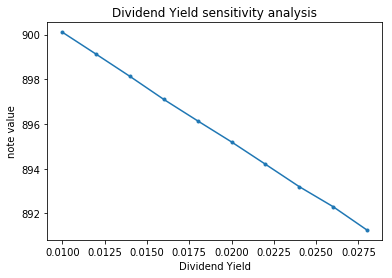

In [80]:
plt.plot(q_sp, div_yield_sensitivity_analysis, marker='.')
plt.xlabel("Dividend Yield")
plt.ylabel("note value")
plt.title("Dividend Yield sensitivity analysis")
plt.show()

In [20]:
different_n = []
for i in range(50,10051,500):
    d = monte_carlo_simulation(s0_sp,s0_na,s0_ru,k_sp,k_na,k_ru,T, q_sp,q_na,q_ru,r,sigma_sp,sigma_na,sigma_ru,i )*np.exp(-r*T)*np.exp(r*5/365)
    different_n.append(d)

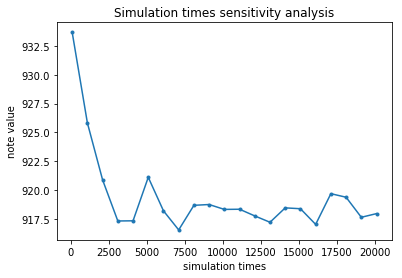

In [26]:
plt.plot(np.array(range(50,10051,500))*2, different_n, marker='.')
plt.xlabel("simulation times")
plt.ylabel("note value")
plt.title("Simulation times sensitivity analysis")
plt.show()

## sensitivity analysis for more time steps

## 37 time steps

In [62]:
s0_sp =2630.07
s0_na = 7897.128
s0_ru = 1180.319
k_sp = 0.7*s0_sp
k_na = 0.7*s0_na
k_ru = 0.7*s0_ru
T = 550/365
q_sp = 0.023428
q_na = 0.011904
q_ru = 0.017059
r = 0.00368677991 # risk-free rate at 550 days
sigma_sp = 0.3642
sigma_na = 0.36323
sigma_ru = 0.41784

In [63]:
time_grid = np.array([0.0424657535,0.084931507,0.124657534,0.167123288,0.208219178,0.249315068,0.2506849315,0.291780822,0.331506849,0.379452055,0.416438356,0.4602739725,
                      0.501369863,0.5410958905,0.583561644,0.624657534,0.668493151,0.708219178,0.75890411,0.7946729,0.835616438,0.8780821915,0.920547945,0.9602739725,1.00,
                      1.0410959,1.082191781,1.1232876,1.164383562,1.206849,1.249315068,1.290410958,1.331506849,1.3739726,1.416438356,1.4616438,1.506849315])
time_grid.shape

(37,)

In [64]:
np.random.seed(9)
S_sp = np.zeros([2*n, 37])
S_na = np.zeros([2*n, 37])
S_ru = np.zeros([2*n, 37])
monte_calo_sp = np.zeros([2*n,37])
monte_calo_na = np.zeros([2*n,37])
monte_calo_ru = np.zeros([2*n,37])
def mc(x):
    for i in range(2 * n):
        if i % 2 == 0:
            x[i, :] = np.random.normal(0, 1, 37)
        else:
            x[i, :] = -x[i - 1, :]



mc(monte_calo_sp)
mc(monte_calo_na)
mc(monte_calo_ru)

V = np.zeros(2*n)

In [65]:
for j in range(2 * n):
        for i in range(37):
            if i == 0:
                S_sp[j, i] = s0_sp * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[0]) + sigma_sp * time_grid[0] ** 0.5 * monte_calo_sp[
                        j, i])
                S_na[j, i] = s0_na * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[0]) + cov_root[1, 0] * time_grid[0] ** 0.5 *
                    monte_calo_sp[
                        j, i] + cov_root[1, 1] * time_grid[0] ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = s0_ru * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[0]) + cov_root[2, 0] * time_grid[0] ** 0.5 *
                    monte_calo_sp[
                        j, i] + cov_root[2, 1] * time_grid[0] ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * time_grid[
                        0] ** 0.5 * monte_calo_ru[j, i])



            elif (i == 5 or i == 12 or i == 18 or i == 24 or i == 30):
                S_sp[j, i] = S_sp[j, i - 1] * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[i] - time_grid[i - 1]) + sigma_sp * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i])
                S_na[j, i] = S_na[j, i - 1] * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[1, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[1, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = S_ru[j, i - 1] * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[2, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[2, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_ru[j, i])

                if (S_sp[j, i] >= k_sp and S_na[j, i] >= k_na and S_ru[j, i] >= k_ru):
                    if (S_sp[j, i] >= s0_sp and S_na[j, i] >= s0_na and S_ru[j, i] >= s0_ru):
                        V[j] = np.exp((T - time_grid[i] - 5 / 365) * r) * 1033.75 + V[j]
                        break
                    else:
                        V[j] = np.exp((T - time_grid[i] - 5 / 365) * r) * 33.75 + V[j]


            elif i == 36:
                S_sp[j, i] = S_sp[j, i - 1] * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[i] - time_grid[i - 1]) + sigma_sp * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i])
                S_na[j, i] = S_na[j, i - 1] * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[1, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[1, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = S_ru[j, i - 1] * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[2, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[2, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_ru[j, i])

                if (S_sp[j, i] >= s0_sp and S_na[j, i] >= s0_na and S_ru[j, i] >= s0_ru) or (
                        np.all(S_sp[j, 0:i] >= k_sp) and np.all(S_na[j, 0:i] >= k_na) and np.all(S_ru[j, 0:i] >= k_ru)):
                    V[j] = 1033.75 * np.exp(-r * (3 / 365)) + V[j]

                else:
                    if (S_sp[j, i] >= k_sp and S_na[j, i] >= k_na and S_ru[j, i] >= k_ru):
                        V[j] = (1033.75 + (1000 * np.min(
                            [S_sp[j, i] / s0_sp - 1, S_na[j, i] / s0_na - 1, S_ru[j, i] / s0_ru - 1]))) * np.exp(
                            -r * (3 / 365)) + V[j]
                    else:
                        V[j] = (1000 + (1000 * np.min(
                            [S_sp[j, i] / s0_sp - 1, S_na[j, i] / s0_na - 1, S_ru[j, i] / s0_ru - 1]))) * np.exp(
                            -r * (3 / 365)) + V[j]


            else:
                S_sp[j, i] = S_sp[j, i - 1] * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[i] - time_grid[i - 1]) + sigma_sp * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i])
                S_na[j, i] = S_na[j, i - 1] * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[1, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[1, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = S_ru[j, i - 1] * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[2, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[2, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_ru[j, i])

In [66]:
V_more_steps = np.mean(V)*np.exp(-r*T)*np.exp(r*5/365)
V_more_steps

916.9376245059603

In [18]:
error_more_steps = 931 - V_more_steps
error_more_steps

14.062375494039657

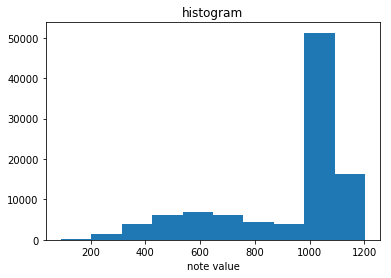

In [67]:
plt.hist(V)
plt.xlabel("note value")
plt.title("histogram")
plt.show()

 ## 365 time steps

In [91]:
s0_sp =2630.07
s0_na = 7897.128
s0_ru = 1180.319
k_sp = 0.7*s0_sp
k_na = 0.7*s0_na
k_ru = 0.7*s0_ru
T = 550/365
q_sp = 0.023428
q_na = 0.011904
q_ru = 0.017059
r = 0.00368677991 # risk-free rate at 550 days
sigma_sp = 0.3642
sigma_na = 0.36323
sigma_ru = 0.41784
M = 365
dt = T/M

In [92]:
time_grid = np.arange(0,1.506849315+dt,dt)[1:366]

In [93]:
np.random.seed(9)
S_sp = np.zeros([2*n, M])
S_na = np.zeros([2*n, M])
S_ru = np.zeros([2*n, M])
monte_calo_sp = np.zeros([2*n,M])
monte_calo_na = np.zeros([2*n,M])
monte_calo_ru = np.zeros([2*n,M])
def mc(x):
    for i in range(2 * n):
        if i % 2 == 0:
            x[i, :] = np.random.normal(0, 1, M)
        else:
            x[i, :] = -x[i - 1, :]



mc(monte_calo_sp)
mc(monte_calo_na)
mc(monte_calo_ru)

V = np.zeros(2*n)

In [94]:
for j in range(2 * n):
        for i in range(365):
            if i == 0:
                S_sp[j, i] = s0_sp * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[0]) + sigma_sp * time_grid[0] ** 0.5 * monte_calo_sp[
                        j, i])
                S_na[j, i] = s0_na * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[0]) + cov_root[1, 0] * time_grid[0] ** 0.5 *
                    monte_calo_sp[
                        j, i] + cov_root[1, 1] * time_grid[0] ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = s0_ru * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[0]) + cov_root[2, 0] * time_grid[0] ** 0.5 *
                    monte_calo_sp[
                        j, i] + cov_root[2, 1] * time_grid[0] ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * time_grid[
                        0] ** 0.5 * monte_calo_ru[j, i])



            elif (i == 60  or i == 121  or i == 184  or i == 242  or i == 303 ):
                S_sp[j, i] = S_sp[j, i - 1] * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[i] - time_grid[i - 1]) + sigma_sp * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i])
                S_na[j, i] = S_na[j, i - 1] * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[1, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[1, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = S_ru[j, i - 1] * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[2, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[2, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_ru[j, i])

                if (S_sp[j, i] >= k_sp and S_na[j, i] >= k_na and S_ru[j, i] >= k_ru):
                    if (S_sp[j, i] >= s0_sp and S_na[j, i] >= s0_na and S_ru[j, i] >= s0_ru):
                        V[j] = np.exp((T - time_grid[i] - 5 / 365) * r) * 1033.75 + V[j]
                        break
                    else:
                        V[j] = np.exp((T - time_grid[i] - 5 / 365) * r) * 33.75 + V[j]


            elif i == 364:
                S_sp[j, i] = S_sp[j, i - 1] * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[i] - time_grid[i - 1]) + sigma_sp * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i])
                S_na[j, i] = S_na[j, i - 1] * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[1, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[1, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = S_ru[j, i - 1] * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[2, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[2, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_ru[j, i])

                if (S_sp[j, i] >= s0_sp and S_na[j, i] >= s0_na and S_ru[j, i] >= s0_ru) or (
                        np.all(S_sp[j, 0:i] >= k_sp) and np.all(S_na[j, 0:i] >= k_na) and np.all(S_ru[j, 0:i] >= k_ru)):
                    V[j] = 1033.75 * np.exp(-r * (3 / 365)) + V[j]

                else:
                    if (S_sp[j, i] >= k_sp and S_na[j, i] >= k_na and S_ru[j, i] >= k_ru):
                        V[j] = (1033.75 + (1000 * np.min(
                            [S_sp[j, i] / s0_sp - 1, S_na[j, i] / s0_na - 1, S_ru[j, i] / s0_ru - 1]))) * np.exp(
                            -r * (3 / 365)) + V[j]
                    else:
                        V[j] = (1000 + (1000 * np.min(
                            [S_sp[j, i] / s0_sp - 1, S_na[j, i] / s0_na - 1, S_ru[j, i] / s0_ru - 1]))) * np.exp(
                            -r * (3 / 365)) + V[j]


            else:
                S_sp[j, i] = S_sp[j, i - 1] * np.exp(
                    (r - q_sp - 0.5 * sigma_sp ** 2) * (time_grid[i] - time_grid[i - 1]) + sigma_sp * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i])
                S_na[j, i] = S_na[j, i - 1] * np.exp(
                    (r - q_na - 0.5 * sigma_na ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[1, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[1, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i])
                S_ru[j, i] = S_ru[j, i - 1] * np.exp(
                    (r - q_ru - 0.5 * sigma_ru ** 2) * (time_grid[i] - time_grid[i - 1]) + cov_root[2, 0] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_sp[j, i] + cov_root[2, 1] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_na[j, i] + cov_root[2, 2] * (
                            time_grid[i] - time_grid[i - 1]) ** 0.5 * monte_calo_ru[j, i])

In [96]:
V_365 = np.mean(V)*np.exp(-r*T)*np.exp(r*5/365)
V_365

915.1426518567681

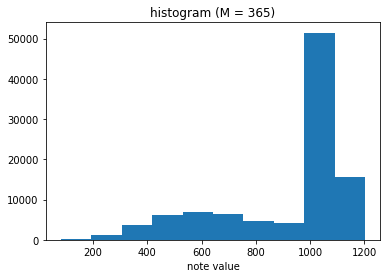

In [99]:
plt.hist(V)
plt.xlabel("note value")
plt.title("histogram (M = 365)")
plt.show()